## LinearRegression vs Rigid Model: Predicting Price of car with Important Features

In [ ]:
#Importnat Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

from category_encoders import OneHotEncoder  # If using `use_cat_names=True`
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Data Import

In [98]:
# Define column names based on the imports-85.names file
column_names = [
    "symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors",
    "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width",
    "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size",
    "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm",
    "city-mpg", "highway-mpg", "price"
]

# Load the data
df = pd.read_csv(r"C:\Users\Admin\OneDrive - United States International University (USIU)\Documents\KULU_Doc\Machine learnig\automobile\imports-85.data", names=column_names)

# Display the first few rows
print(df.head())


   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

##### Check Data Types

Since numerical columns should be int64 or float64, any numeric column stored as an object may have non-numeric values.

In [99]:
print(df.dtypes)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


##### Observation
As we can observe from the above 
- normalized-losses'-->is Numeric, with "?" values
- 'make',-->is Object data type
- 'fuel-type',-->Object
- 'aspiration',--> Object
- 'num-of-doors',-->is not Object data type but 2,4 are written in words and contians "?" 
- 'body-style',--->is Object data type
- 'drive-wheels',--->numeric
- 'engine-location',--->object
- 'engine-type',---> Object
- 'num-of-cylinders'---->Numeric
- 'fuel-system'--->Numeric
- 'bore'---->Numeric
- 'stroke'--->Numeric
- 'horsepower'---->Numeric
- 'peak-rpm',--->Numeric
- price'---->Numeric

In [100]:
df.select_dtypes(include=["object"]).columns

Index(['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type',
       'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower',
       'peak-rpm', 'price'],
      dtype='object')

#### Replace "?" with NaN and Convert to Numeric

In [101]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

##### For num-of-cylindersvand num-of-doors
- contain numbers written as words, we should convert them to numerical values.

In [103]:
df["num-of-doors"].value_counts()

num-of-doors
four    114
two      89
Name: count, dtype: int64

- Mapping [number in words to figure]

In [104]:
# Mapping

# Define mapping of cylinder names to numbers
cylinder_mapping = {
    "two": '2',
    "three": '3',
    "four": '4',
    "five": '5',
    "six": '6',
    "eight": '8',
    "twelve": '12'
}

# Define mapping of door names to numbers
doors_mapping = {
    "two": '2',
    "four": '4',
}

# Apply the mapping
df["num-of-cylinders"] = df["num-of-cylinders"].map(cylinder_mapping)
df["num-of-doors"] = df["num-of-doors"].map(doors_mapping)



In [105]:
df.nunique()

symboling              6
normalized-losses     51
make                  22
fuel-type              2
aspiration             2
num-of-doors           2
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  38
stroke                36
compression-ratio     32
horsepower            59
peak-rpm              23
city-mpg              29
highway-mpg           30
price                186
dtype: int64

In [106]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

#### Object Variable to Number


In [108]:
# Convert to numeric (ensures data type change)
df["num-of-cylinders"] = pd.to_numeric(df["num-of-cylinders"])
df["num-of-doors"] = pd.to_numeric(df["num-of-doors"])
df["normalized-losses"] = pd.to_numeric(df["normalized-losses"])
df["bore"] = pd.to_numeric(df["bore"])
df["stroke"] = pd.to_numeric(df["stroke"])
df["horsepower"] = pd.to_numeric(df["horsepower"])
df["peak-rpm"] = pd.to_numeric(df["peak-rpm"])
df["city-mpg"] = pd.to_numeric(df["city-mpg"])
df["highway-mpg"] = pd.to_numeric(df["highway-mpg"])
df["engine-size"] = pd.to_numeric(df["engine-size"])
df["price"] = pd.to_numeric(df["price"])

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    float64
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

### Handle Missing Values

In [110]:
#Check for missing Values 
print(df.isnull().sum())

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


#### Median or Mean: Histogram
=Using Histogram we can now.
- If the data is skewed → Use the median
- If the data is normally distributed → Use the mean


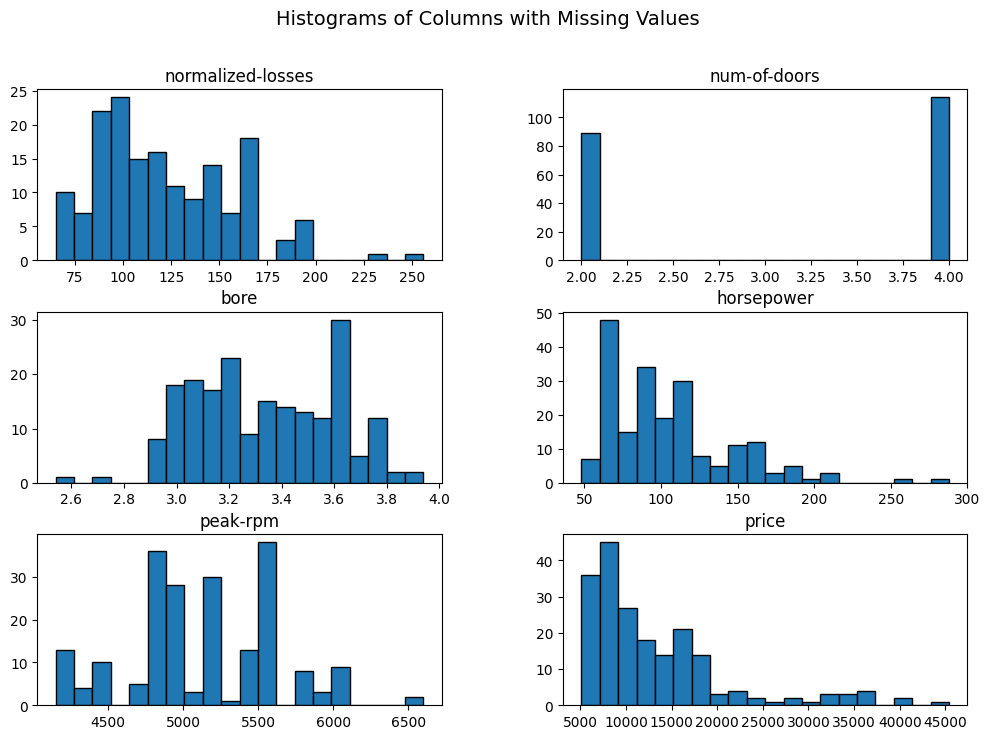

In [111]:
# Select numerical columns with missing values
missing_cols = ["normalized-losses", "num-of-doors", "bore", "horsepower", "peak-rpm", "price"]

# Plot histograms for these columns
df[missing_cols].hist(figsize=(12, 8), bins=20, edgecolor="black", grid=False)

plt.suptitle("Histograms of Columns with Missing Values", fontsize=14)
plt.show()


From the histograms, here are the suggestions for handling missing values in each column:

1️⃣ normalized-losses

    The distribution is skewed, with values ranging from ~50 to 250.
    Suggestion: Impute missing values using median, since the data appears to have outliers.

2️⃣ num-of-doors

    The data has only two distinct values (2 and 4).
    Suggestion: Use mode (most frequent value) to fill missing values. #4

3️⃣ bore

    The distribution is fairly continuous with some missing values.
    Suggestion: Use mean or median depending on whether the missing values are few or many.

4️⃣ horsepower

    The distribution is right-skewed, meaning some extreme values exist.
    Suggestion: Use median to impute missing values to avoid skewing the data.

5️⃣ peak-rpm

    The distribution is multi-modal, meaning the data has multiple peaks.
    Suggestion: Impute using median or the closest cluster-based value.

6️⃣ price

    The distribution is right-skewed, with most cars priced below 15,000.
    Suggestion: If the missing values are few, drop them; otherwise, use median imputation.

### Filling the Missing Values

In [112]:

# Load your dataset (replace 'your_dataframe' with the actual dataframe variable)
df1 = df.copy()

In [113]:
df1['normalized-losses'] = df1['normalized-losses'].fillna(df1['normalized-losses'].median())
df1['num-of-doors'] = df1['num-of-doors'].fillna(df1['num-of-doors'].mode()[0])
df1['bore'] = df1['bore'].fillna(df1['bore'].median())
df1['stroke'] = pd.to_numeric(df1['stroke'], errors='coerce')
df1['stroke'] = df1['stroke'].fillna(df1['stroke'].median())

df1['horsepower'] = df1['horsepower'].fillna(df1['horsepower'].median())
df1['peak-rpm'] = df1['peak-rpm'].fillna(df1['peak-rpm'].median())
df1.dropna(subset=['price'], inplace=True)  # Drop rows where 'price' is NaN


In [114]:
# Confirm missing values handled
print(df1.isnull().sum())  # Should print 0s for all relevant columns
print("Wow! that is good!")

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64
Wow! that is good!


## Model
How to decide on the right machine learning model based on Exploratory Data Analysis (EDA)? - Here’s how EDA guides model selection:

### Correlation
- If high correlation between features → Consider feature selection.
- If low correlation with the target → Some features may be irrelevant.

### Detect Outliers (Boxplots, Z-Score, IQR method)
- If few outliers → Remove them.
- If many outliers → Consider tree-based models (Robust to outliers).

### Check Class Balance (Bar plots, Value Counts)
- If imbalanced dataset (e.g., 90% vs. 10%) → Use SMOTE or class-weighted models.

 ### How EDA Influences Model Selection
- EDA Finding	Model Recommendation
- Mostly numerical data	           --> Linear Regression, XGBoost, Random Forest
- Mostly categorical               -->  data	Decision Trees, Random Forest, Naive Bayes
- Many missing values	           -->   KNN Imputer + XGBoost/Random Forest
- High correlation between features	-->Feature selection + Linear Models
- Highly imbalanced classes	  -->Logistic Regression (class weights), SMOTE + Random Forest
- Non-linear relationships	   -->Tree-based models (Random Forest, XGBoost)
- Too many outliers	            -->Decision Tree, Random Forest, Robust Scaling

In [115]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    float64
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    int64  
 16  engine-size        201 non-null

### Low and High cardinality  :Categorical Variables 
If there's only one category in a column, it won't provide any unique information to our model. At the other extreme, columns where nearly every row has its own category won't help our model in identifying useful trends in the data.

Let's take a look at the cardinality of our features.

In [116]:
df1.select_dtypes(include=["object"]).nunique()

make               22
fuel-type           2
aspiration          2
body-style          5
drive-wheels        3
engine-location     2
engine-type         6
fuel-system         8
dtype: int64

In [117]:
# Drop the 'make' column
df1.drop(columns=['make'], inplace=True)  ##high cardinality


In [118]:
#df1 = df1.drop(columns=['make'])  # Assign only if inplace=False
df1.select_dtypes(include=["object"]).nunique()

fuel-type          2
aspiration         2
body-style         5
drive-wheels       3
engine-location    2
engine-type        6
fuel-system        8
dtype: int64

### Multicollinearity :Numerical Data

<Axes: >

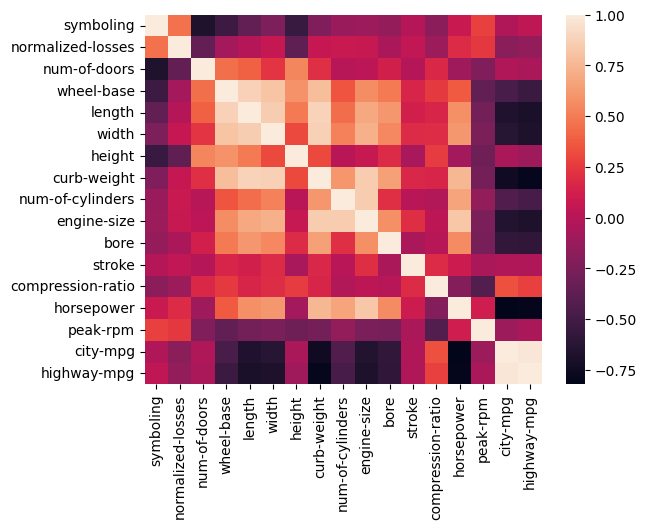

In [119]:
corr = df1.drop(columns=["price"]).select_dtypes("number").corr()
sns.heatmap(corr)

In [120]:
# Select only numerical features (excluding target variable 'price')
df_numeric1 = df1.select_dtypes(include=['number']).drop(columns=['price'], errors='ignore')

# Add a constant for VIF calculation
X = sm.add_constant(df_numeric1)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Drop the constant column
vif_data = vif_data[vif_data["Feature"] != "const"]

# Display results
print(vif_data.sort_values(by="VIF", ascending=False))


              Feature        VIF
16           city-mpg  28.873731
10        engine-size  28.251358
17        highway-mpg  26.683212
8         curb-weight  17.244070
9    num-of-cylinders  12.921062
5              length  10.194873
4          wheel-base   9.554658
14         horsepower   9.072211
6               width   6.149843
11               bore   4.526972
1           symboling   3.192322
7              height   2.586708
3        num-of-doors   2.338242
13  compression-ratio   2.238724
15           peak-rpm   2.100783
12             stroke   1.913399
2   normalized-losses   1.655787


📌 Rules of Thumb for VIF Interpretation

    VIF < 5 🟢 → Low collinearity (Good)
    VIF 5-10 🟠 → Moderate collinearity (Check)
    VIF > 10 🔴 → High collinearity (Remove or Adjust

📌 Recommended Fixes

    Drop one of city-mpg or highway-mpg (they are highly correlated).
    Check correlation between engine-size, curb-weight, and horsepower – drop one or use PCA.
    Drop or transform num-of-cylinders (since it is highly related to engine size).
    Consider Ridge Regression if you must keep all features.

#### Handling Multicollinearity

In [121]:
# Drop high multicollinearity features
df_cleaned=df1.drop(columns=["wheel-base","curb-weight","highway-mpg","engine-size","width"])


In [122]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   fuel-type          201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    float64
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   length             201 non-null    float64
 9   height             201 non-null    float64
 10  engine-type        201 non-null    object 
 11  num-of-cylinders   201 non-null    int64  
 12  fuel-system        201 non-null    object 
 13  bore               201 non-null    float64
 14  stroke             201 non-null    float64
 15  compression-ratio  201 non-null    float64
 16  horsepower         201 non-null

In [123]:
# Select only numerical features (excluding target variable 'price')
df_numeric2 = df_cleaned.select_dtypes("number").drop(columns=['price'], errors='ignore')

# Add a constant for VIF calculation
X = sm.add_constant(df_numeric2)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Drop the constant column
vif_data = vif_data[vif_data["Feature"] != "const"]

# Display results
print(vif_data.sort_values(by="VIF", ascending=False))

              Feature       VIF
10         horsepower  7.460003
12           city-mpg  5.641440
4              length  5.370040
6    num-of-cylinders  3.005338
7                bore  2.762324
1           symboling  2.396781
5              height  2.265125
3        num-of-doors  2.165988
11           peak-rpm  1.886783
9   compression-ratio  1.765115
2   normalized-losses  1.506755
8              stroke  1.199355


Good!

### OR

### PCA: Principal Component Analysis to Handle Multicollinearity
- PCA helps reduce multicollinearity by transforming correlated features into uncorrelated principal components.

In [124]:
df3=df1.copy()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   fuel-type          201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    float64
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    int64  
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non-null

In [125]:
# Separate target and features
target = "price"
features = df3.drop(columns=[target]).select_dtypes(include=[np.number])  # Exclude target

# Standardize only the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [126]:
# Apply PCA
pca = PCA()
pca_components = pca.fit_transform(scaled_features)

# Convert to DataFrame
pca_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(len(features.columns))])

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_


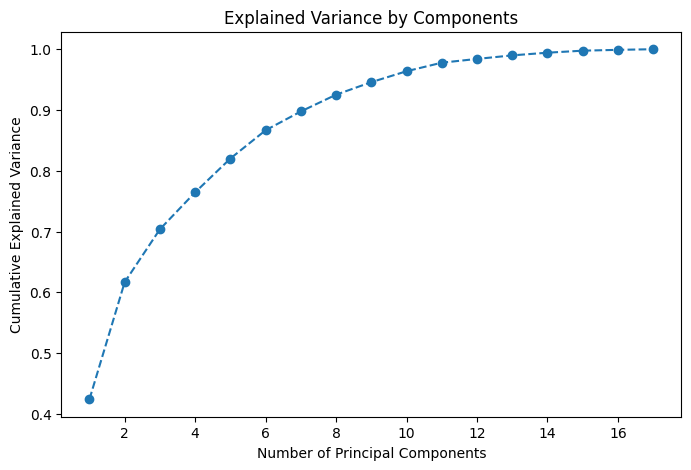

In [127]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(features.columns)+1), np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.show()


In [128]:
pca_opt = PCA(n_components=9)  # Choose between 8 and 10 based on preference
reduced_features = pca_opt.fit_transform(scaled_features)

# Convert to DataFrame
reduced_df = pd.DataFrame(reduced_features, columns=[f'PC{i+1}' for i in range(9)])


In [129]:
# Compute VIF for new principal components
vif_data = pd.DataFrame()
vif_data["Feature"] = reduced_df.columns
vif_data["VIF"] = [variance_inflation_factor(reduced_df.values, i) for i in range(reduced_df.shape[1])]

print(vif_data)


  Feature  VIF
0     PC1  1.0
1     PC2  1.0
2     PC3  1.0
3     PC4  1.0
4     PC5  1.0
5     PC6  1.0
6     PC7  1.0
7     PC8  1.0
8     PC9  1.0


Why is VIF = 1.0 for All PCs?

    VIF measures multicollinearity, which tells how much a feature is linearly dependent on the others.
    PCA transforms the original variables into new uncorrelated principal components.
    Since PCA ensures no multicollinearity, the VIF for each PC is 1.0, meaning there is zero correlation among them.

In [130]:
print(reduced_df.columns)
print(df3.select_dtypes("object").columns)


Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'], dtype='object')
Index(['fuel-type', 'aspiration', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'fuel-system'],
      dtype='object')


In [131]:
# Select categorical columns
cat_features = df3.select_dtypes(include=['object'])
# Reset index before merging
reduced_df = reduced_df.reset_index(drop=True)
cat_features = cat_features.reset_index(drop=True)

# Now concatenate
final_df = pd.concat([reduced_df, cat_features], axis=1)

# Check shape
print(final_df.shape)  # Should now be (201, 16)


(201, 16)


In [132]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PC1              201 non-null    float64
 1   PC2              201 non-null    float64
 2   PC3              201 non-null    float64
 3   PC4              201 non-null    float64
 4   PC5              201 non-null    float64
 5   PC6              201 non-null    float64
 6   PC7              201 non-null    float64
 7   PC8              201 non-null    float64
 8   PC9              201 non-null    float64
 9   fuel-type        201 non-null    object 
 10  aspiration       201 non-null    object 
 11  body-style       201 non-null    object 
 12  drive-wheels     201 non-null    object 
 13  engine-location  201 non-null    object 
 14  engine-type      201 non-null    object 
 15  fuel-system      201 non-null    object 
dtypes: float64(9), object(7)
memory usage: 25.3+ KB


#### Split

In [133]:
target = "price"
features=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7','PC8','PC9', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels','engine-location', 'engine-type', 'fuel-system'] # Select all the principal components and the Object dtypes
X=final_df[features]
y=df3[target].reset_index(drop=True)

In [134]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.shape, y.shape)  # Check number of rows in X and y
print(X_train.shape, y_train.shape)  # Check number of rows in X_train and y_train
print(X_test.shape, y_test.shape)  # Check number of rows in X_test and y_test

(201, 16) (201,)
(160, 16) (160,)
(41, 16) (41,)


In [135]:
# Train model
model = make_pipeline(OneHotEncoder(use_cat_names=True),Ridge())
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['fuel-type', 'aspiration', 'body-style',
                                     'drive-wheels', 'engine-location',
                                     'engine-type', 'fuel-system'],
                               use_cat_names=True)),
                ('ridge', Ridge())])

In [136]:
y_pred_training = model.predict(X_train)

mae_training = mean_absolute_error(y_train,y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 1553.27


#### Generalization

In [137]:
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0     9215.760536
1    25469.493159
2     5574.580310
3     7892.029929
4    13921.915407
dtype: float64

In [138]:
# Check if the model is fitted
mae_test = mean_absolute_error(y_test,y_pred_test)
print("Test MAE:", round(mae_test, 2))

Test MAE: 2989.75


In [139]:
# Evaluate model
print("Model Score:", model.score(X_train, y_pred_training))

Model Score: 1.0


In [140]:
# Exclude 'price' from numerical features before PCA
original_feature_names = df3.select_dtypes(include=['number']).drop(columns=['price'], errors='ignore').columns.tolist()

# Check dimensions
print(f"PCA components shape: {pca_opt.components_.shape}")  # Should be (9, n_features)
print(f"Original feature count: {len(original_feature_names)}")  # Should match n_features


PCA components shape: (9, 17)
Original feature count: 17


In [141]:
print(original_feature_names)  # List all numerical features


['symboling', 'normalized-losses', 'num-of-doors', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'num-of-cylinders', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']


#### PCA loadings matrix 
- shows how much each original feature contributes to each principal component (PC). 

In [142]:
pca_loadings = pd.DataFrame(
    pca_opt.components_,
    columns=original_feature_names, 
    index=[f'PC{i+1}' for i in range(len(pca_opt.components_))]
)

print(pca_loadings)


     symboling  normalized-losses  num-of-doors  wheel-base    length  \
PC1  -0.112303           0.007575      0.099965    0.304843  0.341126   
PC2   0.402639           0.321268     -0.382936   -0.223387 -0.110723   
PC3   0.216612           0.210554     -0.270958    0.014296 -0.021922   
PC4   0.026464           0.331907      0.136222    0.196378  0.152946   
PC5  -0.317422          -0.277440      0.187213   -0.073215 -0.113741   
PC6  -0.069001           0.584412      0.128323    0.142661  0.081627   
PC7   0.234242          -0.447759     -0.387958   -0.003797  0.031660   
PC8  -0.195314          -0.007157      0.354571   -0.144292 -0.039027   
PC9   0.549445          -0.149406      0.566800   -0.268135  0.047828   

        width    height  curb-weight  num-of-cylinders  engine-size      bore  \
PC1  0.331838  0.128927     0.359207          0.238084     0.324037  0.258085   
PC2 -0.034877 -0.390777     0.006828          0.120641     0.112820  0.015323   
PC3  0.119329 -0.191200   

#### With Out Using PCA

## Build Model

### Split Data

In [143]:
target = "price"
features=['symboling', 'normalized-losses', 'fuel-type', 'aspiration','num-of-doors', 'body-style', 'drive-wheels', 'engine-location','length', 'height', 'engine-type', 'num-of-cylinders', 'fuel-system','bore', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg']
X_train=df_cleaned[features]
y_train=df_cleaned[target]

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#### Base Line

In [145]:
y_mean=y_train.mean()
y_mean

12573.68125

In [146]:
y_mean_baseline=[y_mean]*len(y_train)
y_mean_baseline[:4]

[12573.68125, 12573.68125, 12573.68125, 12573.68125]

In [147]:
mae_base=mean_absolute_error(y_train,y_mean_baseline)
mae_base

5036.0175

### Itrate
Create a pipeline named model that contains
- OneHotEncoder
- Ridge Predictor

In [148]:
model = make_pipeline(OneHotEncoder(use_cat_names=True),Ridge())
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['fuel-type', 'aspiration', 'body-style',
                                     'drive-wheels', 'engine-location',
                                     'engine-type', 'fuel-system'],
                               use_cat_names=True)),
                ('ridge', Ridge())])

### Evaluate

In [96]:
y_pred_itrate=model.predict(X_train)
maeI=mean_absolute_error(y_train,y_pred_itrate)
print("Training MAE:",maeI)

Training MAE: 1688.8572842249328


That is very nice, in baseline modeling the mae was 5036.0175 but now we found Training MAE: 1554.7073103090836 ,bien!

### Model Score-Train

In [ ]:
# Evaluate model
print("Model Score:", model.score(X_train, y_train))

Model Score: 0.8532676214656487


### Generalization
- If we found another data with similar features we can generalize our data

In [ ]:
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0     7670.339353
1    29456.645642
2     4766.195719
3     6888.438415
4    14771.393451
dtype: float64

In [ ]:
maeIT=mean_absolute_error(y_test,y_pred_test)
print("Testing MAE:",maeIT)

Testing MAE: 2578.8671526477992


### Model Score-Test

In [ ]:
# Evaluate model
print("Model Score:", model.score(X_test, y_test))

Model Score: 0.8969712593244178


In [ ]:
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
print("Cross-Validation MAE:", -scores.mean())

Cross-Validation MAE: 2251.0222672407244


🎯  Model Performance Analysis

    Training MAE: 1963.339253271781
    Testing MAE: 2578.8671526477992
    Cross-Validation MAE: 2251.0222672407244

🔍 Model Performance Analysis Interpretation

    Training MAE (1963.34)
        The model performs well on training data, meaning it fits the training data with a reasonable error.

    Testing MAE (2578.87)
        The error is higher on the test set compared to training, suggesting some level of overfitting—the model may be learning patterns specific to the training data that do not generalize well to unseen data.

    Cross-Validation MAE (2251.02)
        This error falls between training and testing MAE, which is a good sign.
        If CV MAE was much lower than Testing MAE, it would indicate the model is not generalizing well.
        Here, it suggests that the model's performance is somewhat stable across different subsets of data.

Next Steps for Improvement

🚀 If Overfitting is a Concern:

    Try increasing regularization strength (alpha) in Ridge Regression.
    Reduce multicollinearity (drop or combine highly correlated features).
    Consider feature selection (Lasso Regression).

🚀 If Underfitting is a Concern:

    Try using a more complex model (e.g., polynomial features, decision trees).
    Allow the model to learn more expressive patterns (reduce regularization slightly). MAE is also close to the testing MAE, indicating the model is not overfitting significantly.

### Communication

In [150]:
feature_names = model.named_steps["onehotencoder"].get_feature_names_out()
print("features len:", len(feature_names))
print(feature_names[:5])  # First five feature names

features len: 39
['symboling' 'normalized-losses' 'fuel-type_gas' 'fuel-type_diesel'
 'aspiration_std']


#### Coefficients

In [156]:
intercept = model.named_steps["ridge"].intercept_
coefficients = model.named_steps["ridge"].coef_
print("Intercept:", intercept)
print("coefficients len:", len(coefficients))
print(coefficients[:5])  # First five coefficients

Intercept: -53670.22251345553
coefficients len: 39
[  599.55547766     4.26509303 -1553.66614636  1553.66614636
  -457.09865795]


##### Important Features

In [159]:
feat_imp = pd.Series(coefficients,index=feature_names)
feat_imp.head()

symboling             599.555478
normalized-losses       4.265093
fuel-type_gas       -1553.666146
fuel-type_diesel     1553.666146
aspiration_std       -457.098658
dtype: float64

In [160]:
print(f"price = {intercept.round(2)}")
for f, c in feat_imp.items():
    print(f"+ ({round(c, 2)} * {f})")

price = -53670.22
+ (599.56 * symboling)
+ (4.27 * normalized-losses)
+ (-1553.67 * fuel-type_gas)
+ (1553.67 * fuel-type_diesel)
+ (-457.1 * aspiration_std)
+ (457.1 * aspiration_turbo)
+ (643.9 * num-of-doors)
+ (-990.45 * body-style_sedan)
+ (-303.31 * body-style_hatchback)
+ (-2831.03 * body-style_wagon)
+ (1431.7 * body-style_hardtop)
+ (2693.08 * body-style_convertible)
+ (1449.07 * drive-wheels_rwd)
+ (-1018.42 * drive-wheels_fwd)
+ (-430.65 * drive-wheels_4wd)
+ (-2333.34 * engine-location_front)
+ (2333.34 * engine-location_rear)
+ (169.83 * length)
+ (286.6 * height)
+ (-2060.92 * engine-type_ohcv)
+ (827.77 * engine-type_ohc)
+ (453.6 * engine-type_ohcf)
+ (-437.52 * engine-type_l)
+ (-1547.38 * engine-type_dohc)
+ (2764.44 * engine-type_rotor)
+ (3209.8 * num-of-cylinders)
+ (-477.56 * fuel-system_mpfi)
+ (344.77 * fuel-system_1bbl)
+ (-912.74 * fuel-system_2bbl)
+ (1553.67 * fuel-system_idi)
+ (-1379.53 * fuel-system_spdi)
+ (-979.5 * fuel-system_mfi)
+ (-913.55 * fuel-sys

Text(0.5, 1.0, 'Feature importance for Car Price')

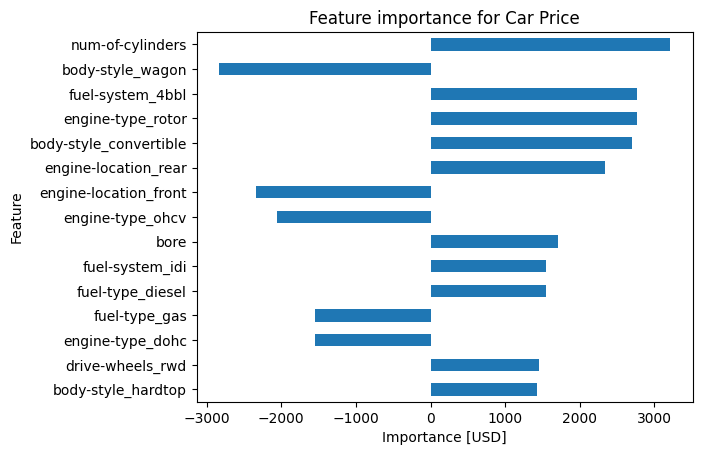

In [162]:
feat_imp.sort_values(key=abs).tail(15).plot(kind="barh")
plt.xlabel("Importance [USD]")
plt.ylabel("Feature")
plt.title("Feature importance for Car Price")

Looking at this bar chart, we can see that the features of car like Number of cylinder and 4bbl fuel system, rotor engine type, convertible body style,engine location rear increase the predicted price of an apartment, while  like wagon body style and engine location rear decrease the predicted price. 

In [165]:
feat_imp.values

array([ 5.99555478e+02,  4.26509303e+00, -1.55366615e+03,  1.55366615e+03,
       -4.57098658e+02,  4.57098658e+02,  6.43899765e+02, -9.90447915e+02,
       -3.03308620e+02, -2.83102519e+03,  1.43169900e+03,  2.69308273e+03,
        1.44906609e+03, -1.01842086e+03, -4.30645231e+02, -2.33334010e+03,
        2.33334010e+03,  1.69833178e+02,  2.86603357e+02, -2.06091686e+03,
        8.27772760e+02,  4.53603233e+02, -4.37519401e+02, -1.54738276e+03,
        2.76444303e+03,  3.20980184e+03, -4.77557685e+02,  3.44771051e+02,
       -9.12742753e+02,  1.55366615e+03, -1.37953079e+03, -9.79495611e+02,
       -9.13553390e+02,  2.76444303e+03,  1.70690564e+03, -3.41041524e+02,
        3.98147234e+01,  4.40848617e-01,  2.29170345e+01])

In [166]:
len(feat_imp)

39

In [167]:
data=[]
for c in feat_imp.values:
    if len(data)<15:
        data.append(c)
print(data)

[599.5554776566489, 4.265093029112296, -1553.6661463623589, 1553.6661463623611, -457.0986579493434, 457.09865794932233, 643.8997654206768, -990.4479154546409, -303.3086199586419, -2831.025192825307, 1431.6990020525475, 2693.0827261863014, 1449.0660877593284, -1018.4208563230704, -430.64523143651036]


In [168]:
len(data)

15

If you want to check with LinearRegression just replace "Ridge" with "LinearRegression"